In [116]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



%matplotlib inline

In [117]:
ATT = pd.read_csv('ATT1.csv')

In [118]:
ATT

,date,open,high,low,close,volume
0,1984-07-19,1.0554,1.0576,1.0489,1.0489,934800
1,1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600
2,1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200
3,1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200
4,1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800
...,...,...,...,...,...,...
9185,2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092
9186,2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385
9187,2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749
9188,2020-12-30,28.5400,28.6800,28.4300,28.4900,34302430


In [119]:
pd.Timestamp('1984-07-20')

Timestamp('1984-07-20 00:00:00')

In [120]:
Timestamp = []
for i in ATT['date']:
    Timestamp.append(pd.Timestamp(i))


In [121]:
ATT['Timestamp'] = Timestamp

In [122]:
ATT = ATT.set_index('Timestamp')

In [123]:
ATT.index

DatetimeIndex(['1984-07-19', '1984-07-20', '1984-07-23', '1984-07-24',
               '1984-07-25', '1984-07-26', '1984-07-27', '1984-07-30',
               '1984-07-31', '1984-08-01',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Timestamp', length=9190, freq=None)

In [124]:
ATT['day_of_week'] = ATT.index.dayofweek
ATT['day_of_month'] = ATT.index.day
ATT['month'] = ATT.index.month

In [125]:
ATT

,date,open,high,low,close,volume,day_of_week,day_of_month,month
Timestamp,,,,,,,,,
1984-07-19,1984-07-19,1.0554,1.0576,1.0489,1.0489,934800,3,19,7
1984-07-20,1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600,4,20,7
1984-07-23,1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200,0,23,7
1984-07-24,1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200,1,24,7
1984-07-25,1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800,2,25,7
...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092,3,24,12
2020-12-28,2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385,0,28,12
2020-12-29,2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749,1,29,12


In [126]:
close = ATT['close']

<AxesSubplot:xlabel='Timestamp'>

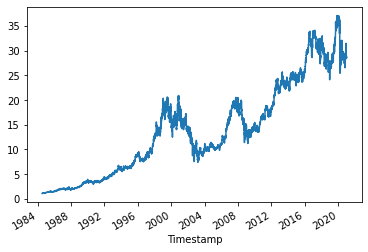

In [127]:
close.plot(kind='line')

In [128]:
len(ATT)

9190

In [129]:
# split into train and test:

train_size = int(len(ATT) * 0.9)
test_size = len(ATT) - train_size
train, test = ATT[0:train_size], ATT[train_size:len(ATT)]

print(train.shape,test.shape)

(8271, 9) (919, 9)


In [130]:
#transform:
from sklearn.preprocessing import RobustScaler

f_columns = ['open', 'high', 'low','volume']

f_transformer = RobustScaler()
close_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
close_transformer = close_transformer.fit(train[['close']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['close'] = close_transformer.transform(train[['close']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['close'] = close_transformer.transform(test[['close']])

/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [131]:
def create_dataset(X, y, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(X) - time_steps):
        a  = X.iloc[i:(i+time_steps)].to_numpy()
        dataX.append(a)
        dataY.append(y.iloc[i + time_steps])
    return np.array(dataX), np.array(dataY)

In [132]:
TIME_STEPS = 5

In [133]:
x_train, y_train = create_dataset(train, train.close, time_steps=TIME_STEPS)
x_test, y_test = create_dataset(test, test.close, time_steps=TIME_STEPS)


In [134]:
# samples, time_steps, n_features
print(x_train.shape,y_train.shape)

(8266, 5, 9) (8266,)


In [135]:
#Modeling:

In [136]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units = 128,
          input_shape=(x_train.shape[1],x_train.shape[2])
          )
    )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

In [137]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.1,
    #shuffle=False
)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_train_inv = close_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = close_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = close_transformer.inverse_transform(y_pred)


In [ ]:
plt.plot(y_test_inv.flatten(),marker='.', label='true')
plt.plot(y_pred_inv.flatten(),'r', marker='.', label='predicted')
plt.legend()